In [1]:
#importing the libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# reading the imput training data.
train=pd.read_csv('train.csv')

In [4]:
# Examining the head of the training data.
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Gathering the information about the training data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# examining the Null values in the training data.
train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


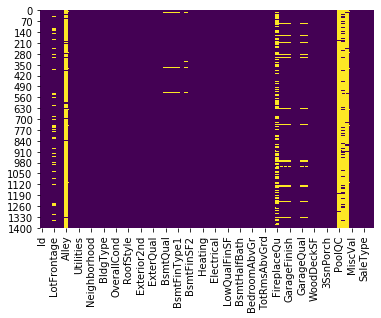

In [7]:
#plotting out the null values in the training data to estimate which columns have null values.
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

In [8]:
# gathering the test data from csv file.
test=pd.read_csv('test.csv')

In [9]:
# Examining the head of the test data.
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
#Gathering the information about the testing data.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [11]:
# examining the number of columns and number of rows of training data.
train.shape

(1460, 81)

In [12]:
# examining the number of rows and number of columns of test data.
test.shape

(1459, 80)

In [13]:
# generating a correlaton matrix of the training data.
corr_mat=train.corr()

In [14]:
# displaying the correlation matrix.
corr_mat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [15]:
# filtering the features which have more impact on the target value.
main_corr_features=corr_mat.index[abs(corr_mat['SalePrice'])>0.5]
main_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

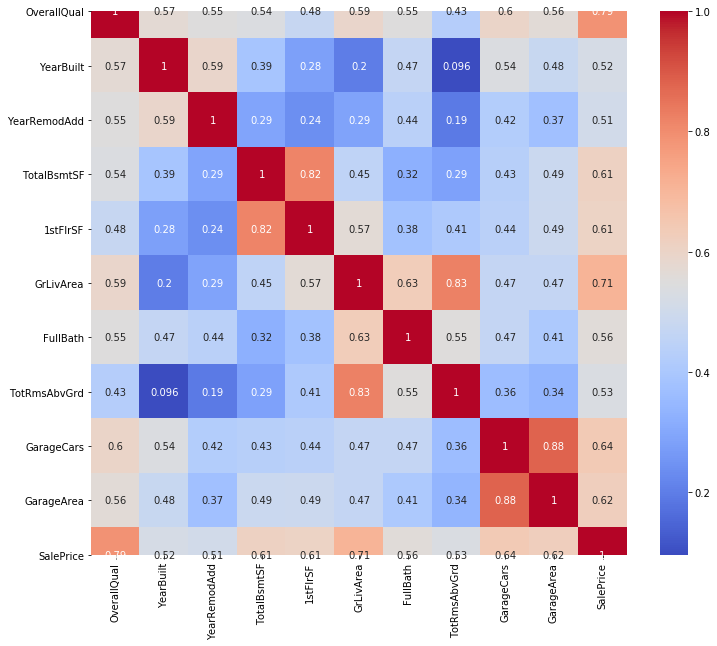

In [16]:
# generating a heatmap of the correlation of most signifacant features.
plt.figure(figsize=(12,10))
sns.heatmap(train[main_corr_features].corr(),annot=True,cmap='coolwarm')

In [17]:
# Filtering those columns of training data which have more than 50 null values in it.
train_null_cnt=train.isnull().sum()
train_null_cnt=train_null_cnt[train_null_cnt>50]
train_null_cnt.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
dtype: int64

In [18]:
# removing the above displayed columns since they might not impact significantly  on training the data.
train.drop(train_null_cnt.index,axis=1,inplace=True)

In [19]:
# checking the shape of the training data.
train.shape

(1460, 70)

In [20]:
# filtering the categorical columns present in training data.
cat_features = train.select_dtypes(include=['object']).columns
cat_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
# number of categorical columns in the training data.
len(cat_features)

34

In [22]:
# filtering the categorical columns present in test data which contains more than 50 null values in it.
test_null_cnt=test.isnull().sum()
test_null_cnt=test_null_cnt[test_null_cnt>50]
test_null_cnt.sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageFinish      78
GarageYrBlt       78
GarageType        76
dtype: int64

In [23]:
# removing the above displayed columns since they might not impact significantly  on predicting the result.
test.drop(test_null_cnt.index,axis=1,inplace=True)

In [24]:
# filtering the categorical columns present in test data.
test_cat_features = test.select_dtypes(include=['object']).columns
test_cat_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
# number of categorical columns in the test data.
len(test_cat_features)

34

In [26]:
# filtering the numerical columns present in the training data.
num_features=train.select_dtypes(exclude=['object']).columns
num_features

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [27]:
# filling the null values in the numerical columns with mean value of that column.
for i in num_features:
    train[i]=train[i].fillna(value=train[i].mean())

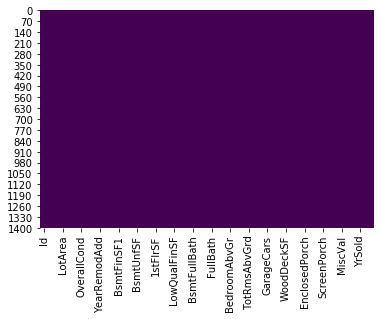

In [28]:
# to ensure that there is no null values in the numerical column of the training data.
sns.heatmap(train[num_features].isnull(),cbar=False,cmap='viridis')

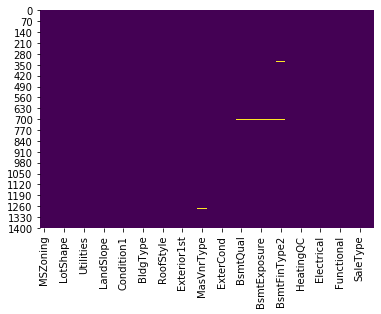

In [29]:
# now we have to deal with the null values present in the categorical columns of the training data.
sns.heatmap(train[cat_features].isnull(),cbar=False,cmap='viridis')

In [30]:
# filtering the categorical columns in training data which contains null values.
last_clean=train.isnull().sum()
last_clean=last_clean[last_clean>0]
last_clean.sort_values(ascending=False)

BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
Electrical       1
dtype: int64

In [31]:
last_clean_features=last_clean.index
last_clean_features

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical'],
      dtype='object')

In [32]:
# filling the null values present in the column with the most frequent value of that column of the training data.
for y in last_clean_features:
    train[y]=train[y].fillna(value=train[y].value_counts().idxmax())

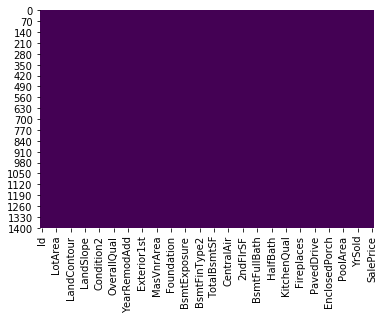

In [33]:
# to ensure that there is no null value present in training data.
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

In [34]:
# filtering the numerical columns present in the test data.
test_num_features=test.select_dtypes(exclude=['object']).columns
test_num_features

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [35]:
# filling the null values in the numerical columns with mean value of that column in the test data.
for i in test_num_features:
    test[i]=test[i].fillna(value=test[i].mean())

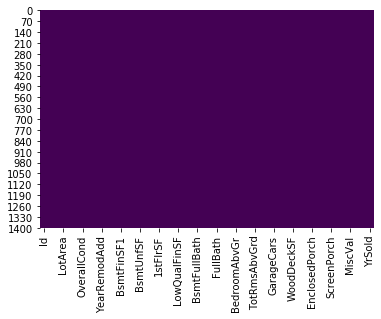

In [36]:
# to ensure that there is no null values in the numerical column of the test data.
sns.heatmap(test[test_num_features].isnull(),cbar=False,cmap='viridis')

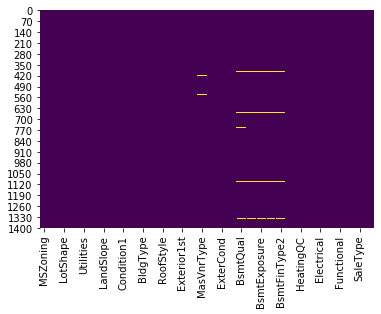

In [37]:
# now we have to deal with the null values present in the categorical columns of the test data.
sns.heatmap(test[test_cat_features].isnull(),cbar=False,cmap='viridis')

In [38]:
# filtering the categorical columns in test data which contains null values.
test_last_clean=test.isnull().sum()
test_last_clean=test_last_clean[test_last_clean>0]
test_last_clean.sort_values(ascending=False)

BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType2    42
BsmtFinType1    42
MasVnrType      16
MSZoning         4
Functional       2
Utilities        2
SaleType         1
KitchenQual      1
Exterior2nd      1
Exterior1st      1
dtype: int64

In [39]:
test_last_clean_features=test_last_clean.index
test_last_clean_features

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'SaleType'],
      dtype='object')

In [40]:
# filling the null values present in the column with the most frequent value of that column of the test data.
for y in test_last_clean_features:
    test[y]=test[y].fillna(value=test[y].value_counts().idxmax())

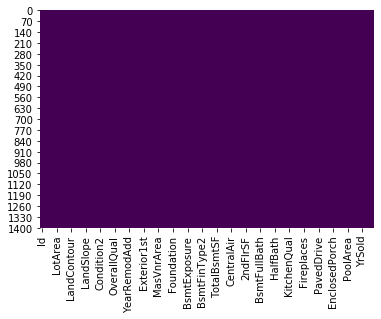

In [41]:
# to ensure that there is no null value present in test data.
sns.heatmap(test.isnull(),cbar=False,cmap='viridis')

In [42]:
# transforming the categorical columns into numerical columns by hot encoding so that machine learning algorithm such as Linear 
# regerssion can be applied on them.
one_hot_encoding_train_predictors=pd.get_dummies(train[cat_features])
one_hot_encoding_test_predictors=pd.get_dummies(test[test_cat_features])
final_train,final_test=one_hot_encoding_train_predictors.align(one_hot_encoding_test_predictors,join='inner',axis=1)

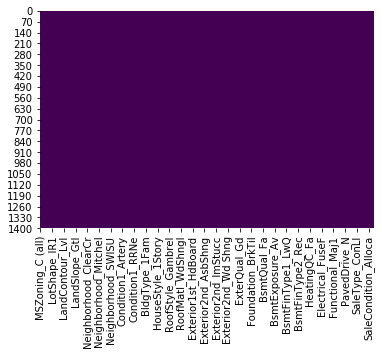

In [43]:
# to ensure that there is no null value present in encoded categorical columns of training data.
sns.heatmap(final_test.isnull(),cbar=False,cmap='viridis')

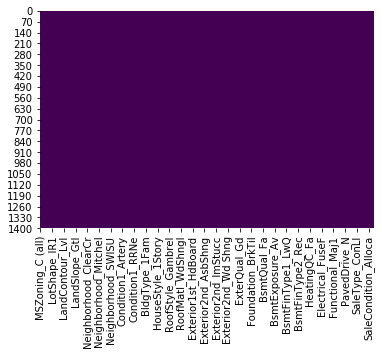

In [44]:
# to ensure that there is no null value present in encoded categorical columns of  test data.
sns.heatmap(final_train.isnull(),cbar=False,cmap='viridis')

In [45]:
# shape of the encoded categorical columns of training data.
final_train.shape

(1460, 200)

In [46]:
# shape of the encoded categorical columns of test data.
final_test.shape

(1459, 200)

In [47]:
# creating a duplicate of the encoded categorical columns of training dataframe so that if something wrong goes off we will not 
# lose the progress we made till now.
train_dup=train

In [48]:
# creating a duplicate of the encoded categorical columns test dataframe so that if something wrong goes off we will not 
#lose the progress we made till now.
test_dup=test

In [49]:
# dropping the categorical columns of training data sice it has been hot encoded and it is no use to model.
train.drop(cat_features,axis=1,inplace=True)

In [50]:
# dropping the categorical columns of test data sice it has been hot encoded and it is no use to model.
test.drop(test_cat_features,axis=1,inplace=True)

In [51]:
# now concatenating the encoded categorical columns of training dataframe to training data to create final cleaned training 
# data.
train=pd.concat([train,final_train],axis=1)

In [52]:
# now concatenating the encoded categorical columns of test dataframe to training data to create final cleaned test
# data.
test=pd.concat([test,final_test],axis=1)

In [53]:
# shape of the cleaned training data.
train.shape

(1460, 236)

In [54]:
# shape of the cleaned test data.
test.shape

(1459, 235)

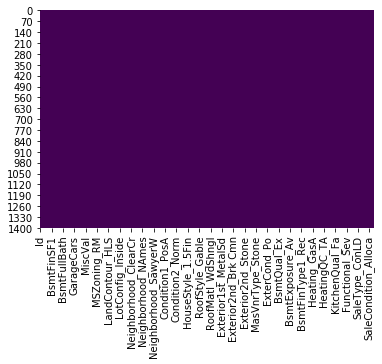

In [55]:
# to ensure there is no NULL values present in the final training data.
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

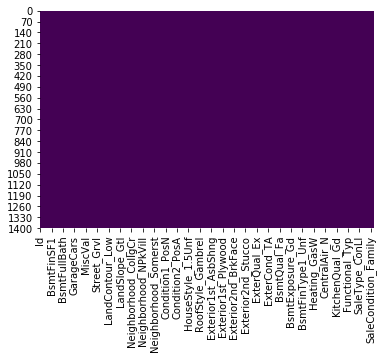

In [56]:
# to ensure there is no NULL values present in the final test data.
sns.heatmap(test.isnull(),cbar=False,cmap='viridis')

In [57]:
# importing the linear regression model from the linear model family.
from sklearn.linear_model import LinearRegression

In [58]:
# seperating the target column from the training data and store in x_train.
x_train=train.drop('SalePrice',axis=1)

In [59]:
# storing the target column in y_train.
y_train=train['SalePrice']

In [60]:
lr=LinearRegression()

In [61]:
# training the model. 
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# using the model to predict the result.
predictions=lr.predict(test)

In [63]:
predictions

array([105442.42601527, 132171.06146989, 176753.62383497, ...,
       161927.32272793,  93318.99000985, 218083.19679463])

In [64]:
# tranforming the result generated into the format as desired in the kaggle.com .
res=pd.DataFrame(predictions,columns=['SalePrice'],index=test['Id'])
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 1 columns):
SalePrice    1459 non-null float64
dtypes: float64(1)
memory usage: 22.8 KB


In [65]:
res

,SalePrice
Id,
1461,105442.426015
1462,132171.061470
1463,176753.623835
1464,187475.371011
1465,211868.399478
...,...
2915,72573.477989
2916,76466.769027
2917,161927.322728


In [66]:
df=res.reset_index()

In [67]:
df

,Id,SalePrice
0,1461,105442.426015
1,1462,132171.061470
2,1463,176753.623835
3,1464,187475.371011
4,1465,211868.399478
...,...,...
1454,2915,72573.477989
1455,2916,76466.769027
1456,2917,161927.322728
1457,2918,93318.990010


In [68]:
# this my_houseprice_output.csv file contains my predictions.
df.to_csv('my_houseprice_output.csv',index=False)